## Imports

In [10]:
#Pandas for Reading and Data Preprocessing
import pandas as pd

#For Visualizations and plots
import matplotlib.pyplot as plt
import seaborn as sns

#For Splitting data and regression models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

#Used to Evaluate Model, accuracy etc
from sklearn import metrics

#Additional model to test LightGBM
import lightgbm as lgb



## Inspect Data

In [11]:
#Read and View first 5 rows of data
carData = pd.read_csv("car data.csv")

carData.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
carData.shape
#301 Cars and 9 Columns In our Data

(301, 9)

In [13]:
carData.info()
# No Missing Values as 301/301 are non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [16]:
#Statistical Data
carData.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [17]:
#Examine the categorical data to see how much data contains each categorical data
print("Fuel Type Counts: \n\n" , carData.Fuel_Type.value_counts())

print("Seller Type Counts: \n\n" , carData.Seller_Type.value_counts())

print("Transmission Counts: \n\n" , carData.Transmission.value_counts())

Fuel Type Counts: 

 Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller Type Counts: 

 Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission Counts: 

 Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


### Encoding Categorical Data


In [18]:
#All Categorical Data Replace with values 0,1 (or 2 for Fuel Type because there is 3 types)
carData.replace({'Fuel_Type':{'Petrol': 0, 'Diesel':1, 'CNG':2}}, inplace=True)
carData.replace({'Transmission':{'Manual': 0, 'Automatic':1}}, inplace=True)
carData.replace({'Seller_Type':{'Dealer': 0, 'Individual':1}}, inplace=True)

carData.head()

/var/folders/yk/872ph_6x49j7bng71hf0fx240000gn/T/ipykernel_6862/2205916466.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  carData.replace({'Fuel_Type':{'Petrol': 0, 'Diesel':1, 'CNG':2}}, inplace=True)
/var/folders/yk/872ph_6x49j7bng71hf0fx240000gn/T/ipykernel_6862/2205916466.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  carData.replace({'Transmission':{'Manual': 0, 'Automatic':1}}, inplace=True)
/var/folders/yk/872ph_6x49j7bng71hf0fx240000gn/T/ipykernel_6862/2205916466.py:4: FutureWarning: Downcasting behavior in `repl

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Splitting Data

In [19]:

#Store Selling Price (What we are predicting) and drop it from X Data along with CarName which is irrelevant to predict
Y = carData["Selling_Price"]
X = carData.drop(["Selling_Price", "Car_Name"], axis=1)

In [20]:
#Train, Text and Split. 20% Testing and 80% Training
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size =0.2, random_state = 42)

## Using Linear Regression

#### Testing with Training Data First

In [21]:
linReg = LinearRegression()

In [22]:
#Training Data
linReg.fit(X_train, y_train)

#Predicting On Training Data
trainPredicLin = linReg.predict(X_train)

In [23]:
#R Squared Error (Coeficcient of Determination), Used for Linear Regressoion while Classification uses accuracy score
rScore = metrics.r2_score(y_train, trainPredicLin)
print("R Squared Error is: ", rScore)

R Squared Error is:  0.8839793496750794


## View Accuracy VIA Comparing Actual (Train Data)

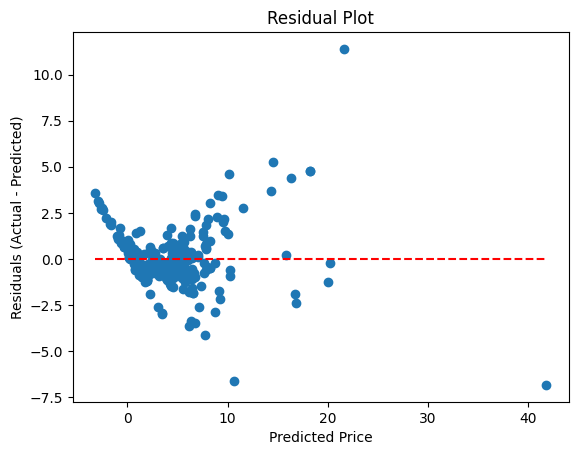

'Over here we see a cluster. But overall not a super non-linear pattern. Residual Plot gives us insight on our assumption about Constant \nVariance. POSSIBLY violated HMMM '

In [31]:
# Calculate residuals (difference between actual and predicted)
residuals = y_train - trainPredicLin

# Plot the residuals
plt.scatter(trainPredicLin, residuals)
plt.hlines(y=0, xmin=min(trainPredicLin), xmax=max(trainPredicLin), colors='r', linestyles='dashed')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

'''Over here we see a cluster. But overall not a super non-linear pattern. Residual Plot gives us insight on our assumption about Constant 
Variance. POSSIBLY violated HMMM '''

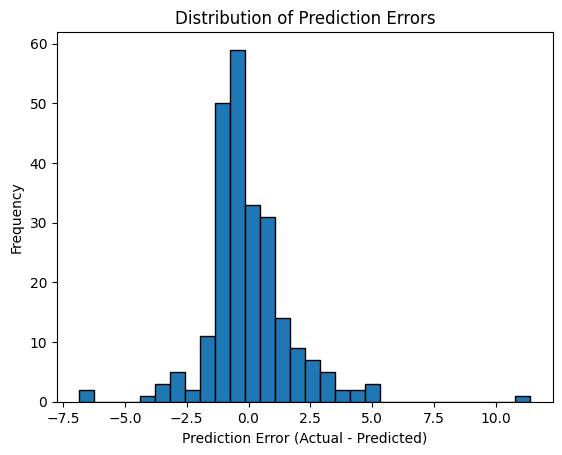

'Over here we aprox a bell shape, confirming assumption of a normal distribution'

In [30]:
# Calculate errors
errors = y_train - trainPredicLin

# Plot error distribution
plt.hist(errors, bins=30, edgecolor='black')
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

'''Over here we aprox a bell shape, confirming assumption of a normal distribution'''

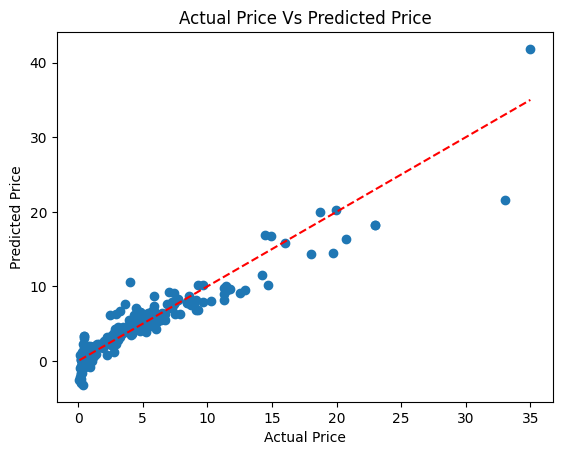

'QQ plot, linear trend, no heavy tails, I see possible outliers but overall can confirm a normal distribution amongust residuals'

In [29]:
plt.scatter(y_train, trainPredicLin)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')  
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()
'''QQ plot, linear trend, no heavy tails, I see possible outliers but overall can confirm a normal distribution amongust residuals'''

#### Using Test Data

In [33]:
#Predicting On Training Data
testPredicLin = linReg.predict(X_test)

In [34]:
#R Squared Error (Coeficcient of Determination), Used for Linear Regressoion while Classification uses accuracy score
rScore = metrics.r2_score(y_test, testPredicLin)
print("R Squared Error is: ", rScore)

R Squared Error is:  0.8954553871532264


## Using Lasso

In [ ]:
#TODO

## Using LightGBM

In [ ]:
#TODO